#### 1. 数据编码格式，需要这种编码才可以成功读取数据

In [2]:
import pandas as pd
train = pd.read_csv('./data/train.csv',encoding='gb18030')
test= pd.read_csv('./data/test.csv',encoding='gb18030')

#### （1）查看数据基本类型，空缺的数量

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26000 entries, 0 to 25999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      26000 non-null  int64 
 1   Text    26000 non-null  object
 2   Labels  26000 non-null  object
dtypes: int64(1), object(2)
memory usage: 609.5+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6153 entries, 0 to 6152
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      6153 non-null   int64 
 1   Text    6153 non-null   object
dtypes: int64(1), object(1)
memory usage: 96.3+ KB


In [17]:
train.describe()

,ID
count,26000.000000
mean,13000.500000
std,7505.697836
min,1.000000
25%,6500.750000
50%,13000.500000
75%,19500.250000
max,26000.000000


In [18]:
train.head()

,ID,Text,Labels
0,1,她们 都 睡 蹑手蹑脚 摸黑 上 床 凑 上 去 想 亲 嫣 一下 她 突然 一个 转身 小...,"['Love', 'Joy']"
1,2,现在 好 终于 如愿以偿,['Joy']
2,3,感受 着 小手 温度 享受 着 这份 她 对 我的 依恋 生怕 动 一下 会 让 她 小手 ...,"['Love', 'Joy', 'Anxiety']"
3,4,望 一眼 背 身 而 卧 妻 如果 她 知道 我的 想法 一定 又 会 那 句 ： 切 又 ...,"['Love', 'Anxiety']"
4,5,眼睛 逐渐 适应 周围 黑暗 借 着 床头 热 奶 器 上 桔红色 指示灯 微弱 光线 慢慢...,"['Love', 'Joy']"


#### （2）数据长度的统计信息

`文本长度统计`

In [6]:
from collections import Counter
#统计文本长度
textCounter = Counter(train['Text'].apply(lambda x:len(str(x))))
#按照文本长度的数量，进行排序
len_train_text = sorted(textCounter.items(),key=lambda x:x[1], reverse=True)

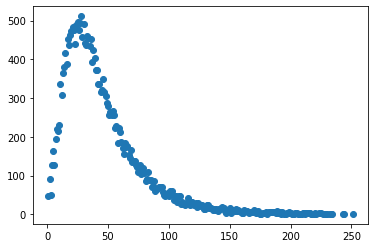

In [7]:
import matplotlib.pyplot as plt
plt.scatter([x[0] for x in len_train_text], [x[1] for x in len_train_text])

`标签类型统计`

In [10]:
#sort的使用
from collections import Counter
d = Counter(train['Labels'])
sorted(d.items(), key=lambda x:x[1], reverse=True)

[("['Love']", 5165),
 ("['Anxiety']", 3184),
 ("['Sorrow']", 2570),
 ("['Love', 'Joy']", 1653),
 ("['Joy']", 1404),
 ("['Anxiety', 'Sorrow']", 1393),
 ("['Expect']", 1137),
 ("['Sorrow', 'Anxiety']", 1026),
 ("['Hate']", 770),
 ("['Joy', 'Love']", 745),
 ("['Love', 'Expect']", 518),
 ("['Expect', 'Love']", 458),
 ("['Anger']", 319),
 ("['Anger', 'Hate']", 296),
 ("['Anxiety', 'Hate']", 282),
 ("['Surprise']", 273),
 ("['Joy', 'Expect']", 205),
 ("['Love', 'Sorrow']", 201),
 ("['Expect', 'Joy']", 185),
 ("['Sorrow', 'Hate']", 175),
 ("['Hate', 'Anger']", 172),
 ("['Anxiety', 'Anger']", 168),
 ("['Love', 'Anxiety']", 167),
 ("['Hate', 'Anxiety']", 132),
 ("['Expect', 'Anxiety']", 122),
 ("['Love', 'Joy', 'Expect']", 118),
 ("['Sorrow', 'Love']", 115),
 ("['Expect', 'Love', 'Joy']", 109),
 ("['Love', 'Surprise']", 109),
 ("['Anxiety', 'Love']", 104),
 ("['Hate', 'Sorrow']", 96),
 ("['Anger', 'Anxiety']", 94),
 ("['Anxiety', 'Expect']", 83),
 ("['Expect', 'Sorrow']", 74),
 ("['Sorrow', 'An

In [11]:
d = {'Labels':train['Labels'].value_counts().index, 'count':train['Labels'].value_counts()}
df_labels = pd.DataFrame(data=d).reset_index(drop=True)
df_labels

,Labels,count
0,['Love'],5165
1,['Anxiety'],3184
2,['Sorrow'],2570
3,"['Love', 'Joy']",1653
4,['Joy'],1404
...,...,...
381,"['Anxiety', 'Sorrow', 'Hate', 'Anger']",1
382,"['Anxiety', 'Expect', 'Anger']",1
383,"['Anxiety', 'Sorrow', 'Expect', 'Anger']",1
384,"['Love', 'Anxiety', 'Sorrow', 'Joy']",1


#### 标签拆分

In [12]:
import ast
#将字符串转换成 list
def get_y_list(line):
    #print(line)
    line =  ast.literal_eval(line)
    #print(line)
    labels = [0 for i in range(8)]
    #print(labels)
    for x in line:
        #print(x)
        for i, y in enumerate(['Love', 'Sorrow', 'Hate', 'Anxiety', 'Surprise', 'Expect', 'Joy', 'Anger']):
            #print(i, y)
            if x == y:
                #print(x, i)
                labels[i] += 1
    return labels
train['y_list'] = train['Labels'].apply(get_y_list)

In [13]:
train.head()

,ID,Text,Labels,y_list
0,1,她们 都 睡 蹑手蹑脚 摸黑 上 床 凑 上 去 想 亲 嫣 一下 她 突然 一个 转身 小...,"['Love', 'Joy']","[1, 0, 0, 0, 0, 0, 1, 0]"
1,2,现在 好 终于 如愿以偿,['Joy'],"[0, 0, 0, 0, 0, 0, 1, 0]"
2,3,感受 着 小手 温度 享受 着 这份 她 对 我的 依恋 生怕 动 一下 会 让 她 小手 ...,"['Love', 'Joy', 'Anxiety']","[1, 0, 0, 1, 0, 0, 1, 0]"
3,4,望 一眼 背 身 而 卧 妻 如果 她 知道 我的 想法 一定 又 会 那 句 ： 切 又 ...,"['Love', 'Anxiety']","[1, 0, 0, 1, 0, 0, 0, 0]"
4,5,眼睛 逐渐 适应 周围 黑暗 借 着 床头 热 奶 器 上 桔红色 指示灯 微弱 光线 慢慢...,"['Love', 'Joy']","[1, 0, 0, 0, 0, 0, 1, 0]"


In [15]:
def getLabel(line, i):
    return line[i]
    
for i,name in enumerate(['Love', 'Sorrow', 'Hate', 'Anxiety', 'Surprise', 'Expect', 'Joy', 'Anger']):
    train[name] = train['y_list'].apply(getLabel, args=(i,))
#保留处理的中间结果
train.to_csv('./data/Middle.csv', index=False)

In [17]:
emotions = ['Love', 'Sorrow', 'Hate', 'Anxiety', 'Surprise', 'Expect', 'Joy', 'Anger']
emotions_num = [0 for i in range(8)]
for i in range(len(train)):
    for j, e in enumerate(emotions):
        emotions_num[j] += train.iloc[i][e]
print(emotions_num)    

[10225, 6760, 2849, 7877, 902, 3695, 5080, 1717]


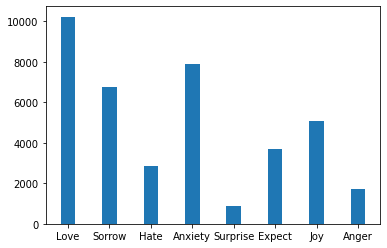

In [19]:
import numpy as np
index = np.arange(8)
plt.bar(index, emotions_num, 0.35)
plt.xticks(np.arange(0, 8), emotions)
plt.show()
#类别分布情况